In [1]:
import pandas as pd

In [8]:
from milestone1.question1 import get_play_by_play_season_gameType

match_type = 3

get_play_by_play_season_gameType("2015","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2016","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2017","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2018","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2019","0"+str(match_type),"data_saved/play_by_play")

100%|███████████████████████████████████████| 1271/1271 [02:47<00:00,  7.60it/s]


In [14]:
from milestone1.question4 import *
from utils import *

#les donnes des saisons régulière seulement!
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'
directory2019 = r'data_saved/play_by_play/2019/regular'


dir = get_current_dir()
df2015 = create_full_df(directory=directory2015, parent_dir=dir)
df2016 = create_full_df(directory=directory2016, parent_dir=dir)
df2017 = create_full_df(directory=directory2017, parent_dir=dir)
df2018 = create_full_df(directory=directory2018, parent_dir=dir)

# 2019/20 comme l' ensemble final des données test.
df2019 = create_full_df(directory=directory2019, parent_dir=dir)

In [15]:
df15_16 = pd.concat([df2015, df2016], ignore_index=True)
df17_18 = pd.concat([df2017, df2018], ignore_index=True)

#utilise les données 2015/16 - 2018/19 de la saison régulière pour créer vos ensembles d'entraînement et de validation.
df_train_val =  pd.concat([df15_16, df17_18], ignore_index=True).sample(frac=1)

In [16]:
df_train_val.head()

,Game_ID,Event_ID,Period_Number,Period_Time,Game_Time,Secondes_jeu,Shot_or_Goal,Shot_Type,Shooter,Team_of_Shooter,...,Est_un_but,Filet_vide,Last_event_type,Rebond,X_last_event,Y_last_event,Sec_from_lastEvent,Dis_from_lastEvent,Angle_change,Vitesse
254854,2018021139,148,2,04:27,24.45,1467.0,Shot,Wrist Shot,Scott Mayfield,NYI,...,0,0,Hit,False,-98.0,31.0,4.2,40.024992,0.0,9.529760
4879,2015020153,76,1,15:53,15.88,952.8,Shot,Slap Shot,Daniel Sedin,VAN,...,0,0,Faceoff,False,69.0,-22.0,10.2,131.518060,0.0,12.893927
5162,2015021191,43,1,08:41,8.68,520.8,Shot,Snap Shot,Matt Martin,NYI,...,0,0,Hit,False,91.0,34.0,7.8,52.201533,0.0,6.692504
239556,2018020923,24,1,02:25,2.41,144.6,Shot,Slap Shot,Valeri Nichushkin,DAL,...,0,0,Hit,False,-66.0,-39.0,3.0,26.400758,0.0,8.800253
134779,2016021104,39,1,08:30,8.50,510.0,Shot,Slap Shot,Nelson Nogier,WPG,...,0,0,Giveaway,False,-77.0,-32.0,6.0,55.326305,0.0,9.221051


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/teylouniseifu/ift-6758-a22/5ce04d3893b44ca181ffeab8e4a17a06



0.9051191742197333
0.5531914893617021


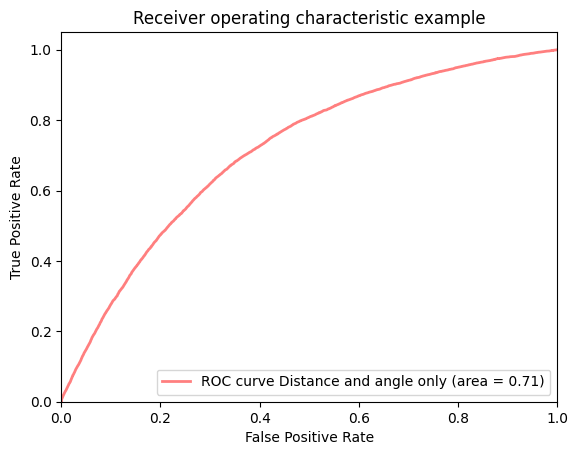

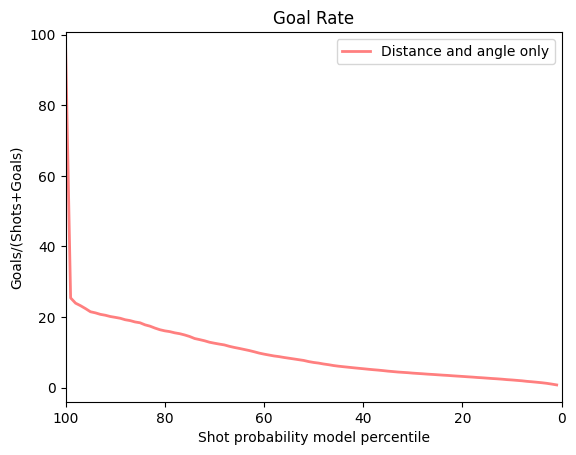

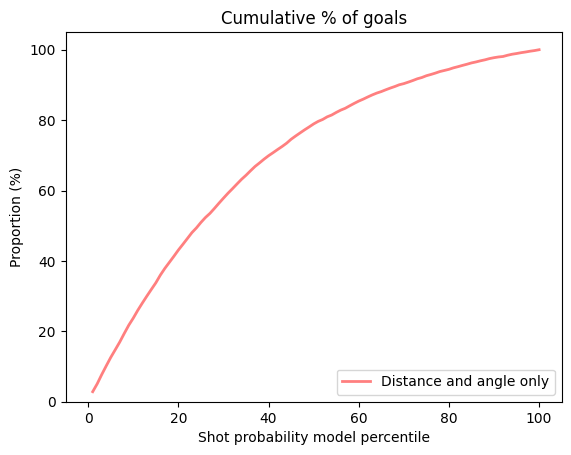

(array([0.00000000e+00, 0.00000000e+00, 5.38984768e-05, ...,
        9.99956881e-01, 9.99967661e-01, 1.00000000e+00]),
 array([0.00000000e+00, 2.05549846e-04, 5.13874615e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
         87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
         74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
         61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
         48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
         35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
         22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
          9,   8,   7,   6,   5,   4,   3,   2,   1]),
 [95.96131443977356,
  25.41899085044861,
  23.931792378425598,
  23.216843605041504,
  22.395172715187073,
  21.501833200454712,
  21.185144782066345,
  20.764896273612976,
  20.513081550598145,


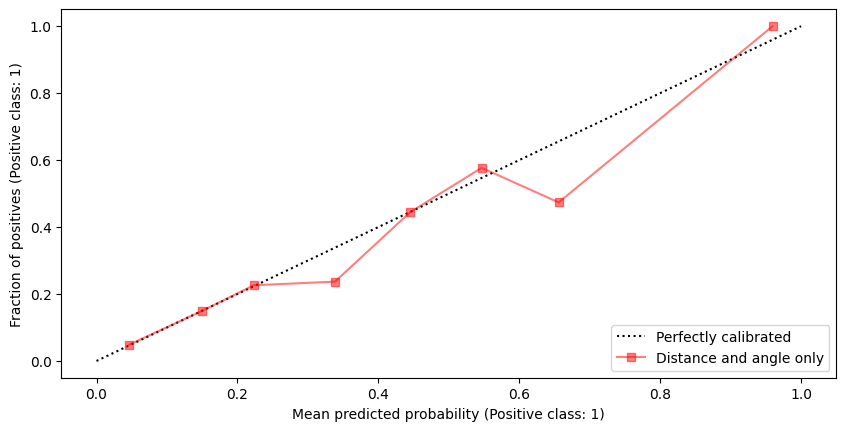

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
import comet_ml
from sklearn.metrics import precision_score, recall_score


experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'angle_and_distance'])

X = df_train_val[[ "Angle", 'Distance']]
Y = df_train_val[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
experiment.log_metric('accuracy', accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)
print(precision)


experiment.set_model_graph(model)
experiment.log_model('Boosted tree(distance and angle)', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

create_plots(X_test, y_test.to_numpy(), y_pred, 'Distance and angle only', experiment)

#https://www.comet.com/teylouniseifu/ift-6758-a22/d2e4bc6546c64b22bfc311ffe4f1cc68

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/6dc15bd4dd01423fa8c679d7128c739a
COMET INFO:   Metrics:
COMET INFO:     precision : 0.6296296296296297
COMET INFO:     recall    : 0.014248297537977999
COMET INFO:     roc       : 0.7581081152819948
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 4
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (2.36 MB)
COMET INFO:     installed pack

Secondes_jeu           float64
Period_Number            int64
X_Coordinate           float64
Y_Coordinate           float64
Distance               float64
Angle                  float64
Shot_Type             category
Last_event_type       category
X_last_event           float64
Y_last_event           float64
Sec_from_lastEvent     float64
Dis_from_lastEvent     float64
Rebond                category
Angle_change           float64
Vitesse                float64
dtype: object
0.9074216806345552
[0.01439556 0.08183673 0.05187229 ... 0.22086824 0.06649069 0.14855713]
(102497, 1)


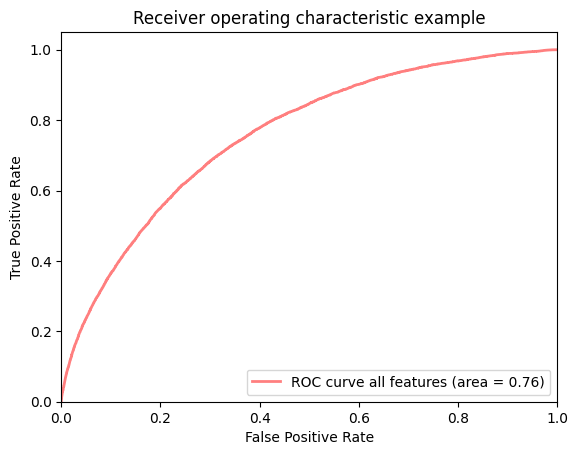

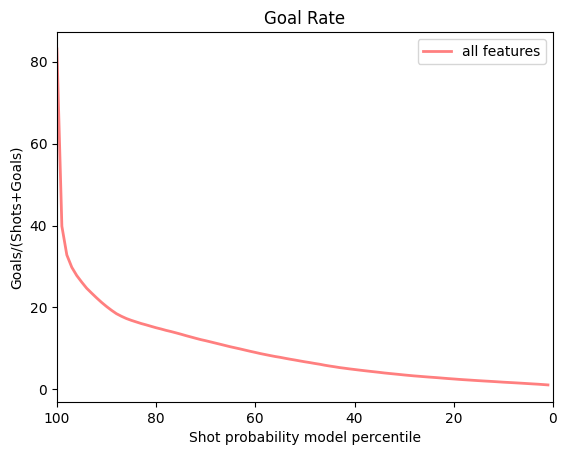

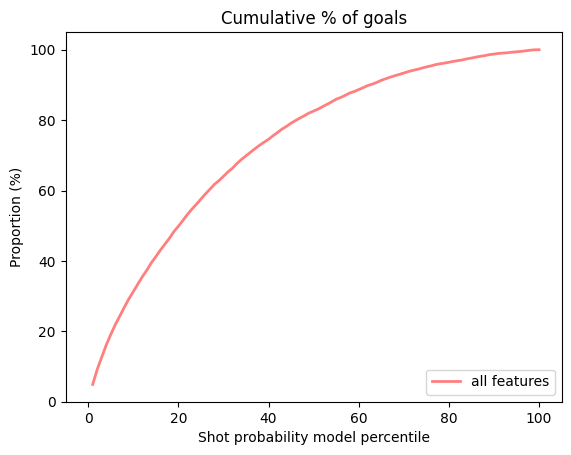

(array([0.        , 0.        , 0.        , ..., 0.99981711, 0.99997848,
        1.        ]),
 array([0.00000000e+00, 1.04766894e-04, 2.09533787e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
         87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
         74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
         61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
         48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
         35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
         22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
          9,   8,   7,   6,   5,   4,   3,   2,   1]),
 [83.11189413070679,
  39.83995783329,
  32.82891511917114,
  29.815080761909485,
  27.800176858901988,
  26.20104372501373,
  24.702512204647057,
  23.512259423732758,
  22.352644622325915,
  21.25374400615692,
  20.247

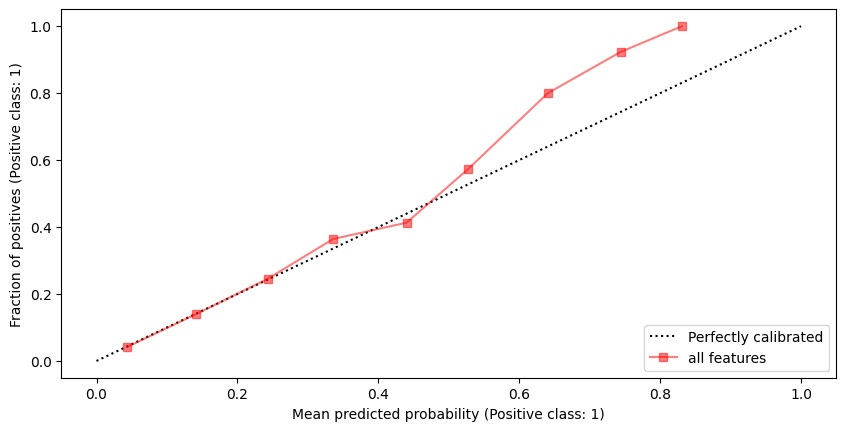

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
import comet_ml
from sklearn.metrics import precision_score, recall_score


experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'all_features'])

df_train_val_params = df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse', 'Est_un_but']]
#df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Last_event_type"]=df_train_val_params["Last_event_type"].astype("category")
df_train_val_params["Shot_Type"]=df_train_val_params["Shot_Type"].astype("category")

X = df_train_val_params[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse']]
#X = df_train_val_params[["Game_Time","Period_Number",  "X_Coordinate", "Rebond", "Pre_type", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]]
Y = df_train_val_params[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 1, max_depth= 5, gamma= 5, colsample_bytree= 0.8, eval_metric='auc', disable_default_eval_metric=True)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

print(X_train.dtypes)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)

#ytest = y_test['Est_un_but']
print(y_pred)
print(y_test.shape)

experiment.set_model_graph(model)
experiment.log_model('Boosted tree(all features) for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'all features', experiment)

#https://www.comet.com/teylouniseifu/ift-6758-a22/ec76d0ead41b4e57bc16ecb0062e1f56

In [9]:
from utils import *

print(grid_search(X, Y["Est_un_but"], model))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'tree_method': 'hist', 'subsample': 1.0, 'min_child_weight': 15, 'max_depth': 6, 'gamma': 8, 'colsample_bytree': 0.9}


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/ec76d0ead41b4e57bc16ecb0062e1f56
COMET INFO:   Metrics:
COMET INFO:     precision : 0.6686390532544378
COMET INFO:     recall    : 0.011695301179879942
COMET INFO:     roc       : 0.7627649385219781
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 4
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (488.43 KB)
COMET INFO:     installed pa

Secondes_jeu          float64
Period_Number           int64
X_Coordinate          float64
Y_Coordinate          float64
Distance              float64
Angle                 float64
X_last_event          float64
Y_last_event          float64
Sec_from_lastEvent    float64
Dis_from_lastEvent    float64
Angle_change          float64
Vitesse               float64
dtype: object
0.9062996965764851


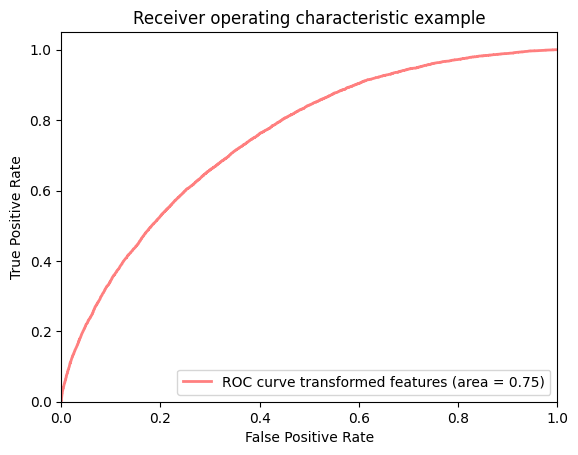

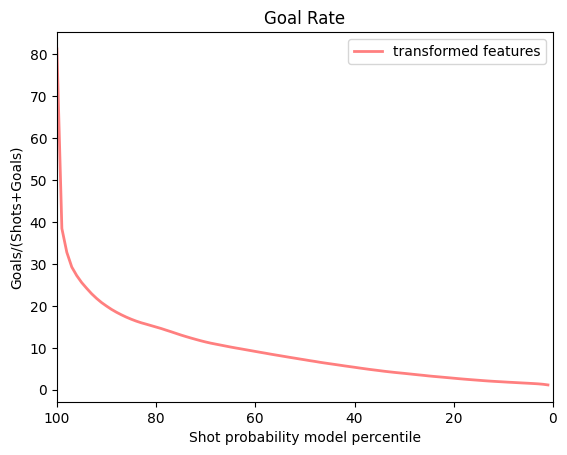

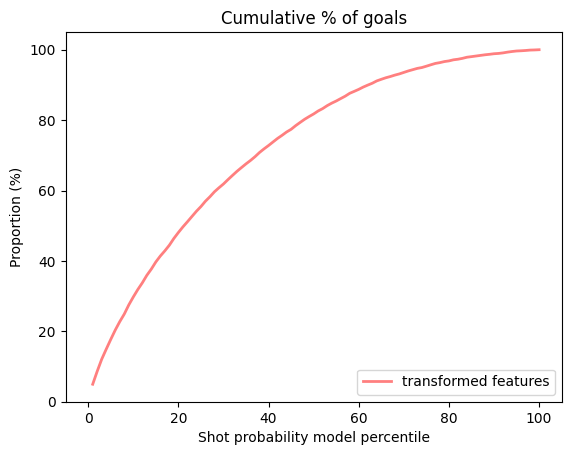

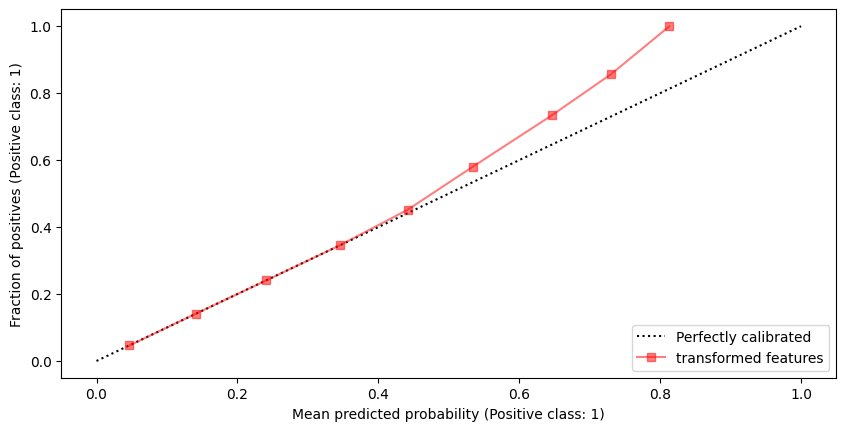

In [7]:
import ray
import comet_ml
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, chi2,  mutual_info_classif, mutual_info_regression, chi2, r_regression, f_classif, f_regression
from utils import *
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from ray.air.callbacks.comet import CometLoggerCallback
from sklearn.metrics import precision_score, recall_score


experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'features_transformed'])

fs = SelectKBest(score_func=f_regression, k=8)
W=df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Angle_change','Vitesse']].copy()
W = replace_nans(W)
W = replace_infs(W)
print(W.dtypes)
Y = df_train_val[["Est_un_but"]]
W = pd.DataFrame(fs.fit_transform(W, Y["Est_un_but"]))
#W["Rebond"]=df_train_val["Rebond"].astype("category")
#W["Last_event_type"]=df_train_val["Last_event_type"].astype("category")
#W["Shot_Type"]=df_train_val["Shot_Type"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(W, Y["Est_un_but"], test_size=0.33, random_state=10)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 0.9, min_child_weight= 5, max_depth= 8, gamma= 5, colsample_bytree= 0.7, eval_metric='auc', disable_default_eval_metric=True)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
experiment.log_metric('accuracy', accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)

experiment.set_model_graph(model)
experiment.log_model('Boosted tree(transformed features) for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')


create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'transformed features', experiment)
#https://www.comet.com/teylouniseifu/ift-6758-a22/fa69d5a607d94932ae785d4e1bcaa7f8

In [51]:
from utils import *

print(grid_search(W, Y["Est_un_but"], model))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'tree_method': 'hist', 'subsample': 0.9, 'min_child_weight': 5, 'max_depth': 8, 'gamma': 5, 'colsample_bytree': 0.7}


2022-11-25 22:09:50.312077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/teylouniseifu/ift-6758-a22/81127974b8ab47f0a978434c574737c3

2022-11-25 22:09:58.019259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized

        Est_un_but
122460           0
221073           0
272766           0
60215            0
84348            0
...            ...
70715            0
231536           0
280472           0
157420           0
266510           0

[208099 rows x 1 columns]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
(20809, 12)
Epoch 1/10
5853/5853 [==============================] - 7s 992us/step - loss: 0.4551 - accuracy: 0.8894 - binary_crossentropy: 0.4551 - mean_squared_error: 0.0962 - val_loss: 0.3149 - val_accuracy: 0.9030 - val_binary_crossentropy: 0.3149 - val_mean_squared_error: 0.0854
Epoch 2/10
5853/5853 [==============================] - 6s 994us/step - loss: 0.3438 - accuracy: 0.8968 - binary_crossentropy: 0.3438 - mean_squared_error: 0.0897 - val_loss: 0.2975 - val_accuracy: 0.9030 - val_binary_crossentropy: 0.2975 - val_mean_squared_error: 0.0832
Epoch 3/10
5853/5853 [==============================] - 6s 1ms/step - loss: 0.3185 - accuracy: 0.9016 - binary_crossentropy: 0.3185 - m

/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
COMET WARNING: Set model graph ignored; already called. Call with overwrite=True to replace graph definition


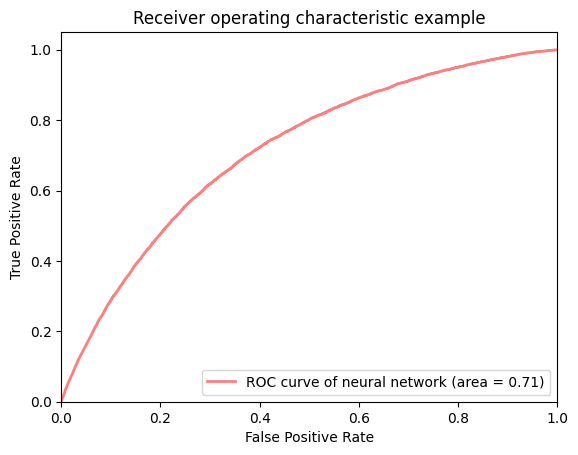

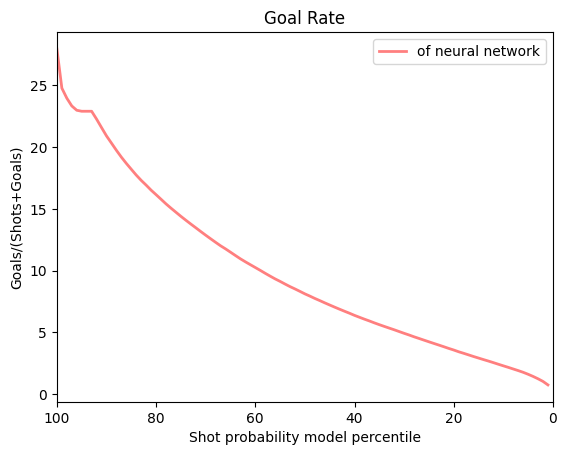

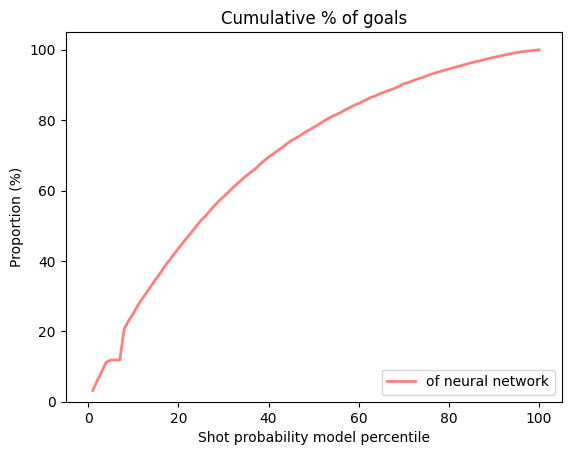

Stored 'info_neural_network' (tuple)


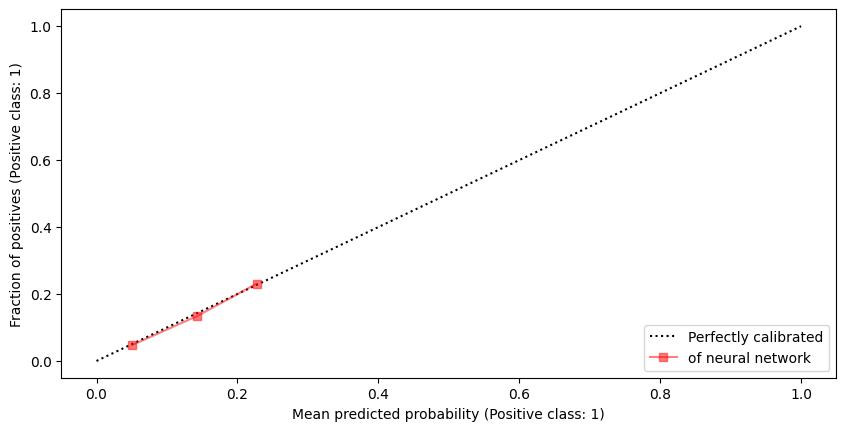

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
from sklearn.metrics import precision_score, recall_score
import comet_ml

from tensorflow import keras
from tensorflow.keras import activations, backend, layers
from tensorflow.keras.utils import to_categorical

experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question6', 'neural_network'])

df_train_val_params = df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse', 'Est_un_but']]
#df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Last_event_type"]=df_train_val_params["Last_event_type"].astype("category")
df_train_val_params["Shot_Type"]=df_train_val_params["Shot_Type"].astype("category")

X = df_train_val_params[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Angle_change','Vitesse']]
#X = df_train_val_params[["Game_Time","Period_Number",  "X_Coordinate", "Rebond", "Pre_type", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]]
Y = df_train_val_params[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

inputs = keras.Input(shape=(X_train.shape[1]))

inner = layers.Flatten()(inputs)

inner = layers.Dense(32, activation='relu')(inner)
inner = layers.Dense(16, activation='relu')(inner)
inner = layers.Dense(4, activation='relu')(inner)

outputs = layers.Dense(1, activation='sigmoid')(inner)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy","mean_squared_error"]
)

print(y_train)

X_train=X_train.to_numpy()
y_train=y_train.to_numpy().reshape((y_train.shape[0]))

print(y_train)


Yv = y_train[:int(y_train.shape[0]/10)]
print(Yv)
Xv = X_train[:int(X_train.shape[0]/10), :].astype(np.float32)

Y = y_train[int(y_train.shape[0]/10):]
X = X_train[int(X_train.shape[0]/10):, :].astype(np.float32)

print(Yv)
print(Xv.shape)

history = model.fit(X,
                    Y,
                    batch_size=32,
                    epochs=10,
                    validation_data=(Xv, Yv))

y_pred = model.predict(X_test)
print(y_pred)
y_pred=y_pred.reshape(y_pred.shape[0])

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
experiment.log_metric('accuracy', accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)
experiment.set_model_graph(model)

experiment.log_model('neural network for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

info_neural_network = create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'of neural network', experiment)

%store info_neural_network

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
import comet_ml
from sklearn.metrics import precision_score, recall_score


df_train_val =  df2019.sample(frac=1)

df_train_val_params = df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse', 'Est_un_but']]
#df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Last_event_type"]=df_train_val_params["Last_event_type"].astype("category")
df_train_val_params["Shot_Type"]=df_train_val_params["Shot_Type"].astype("category")

X = df_train_val_params[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse']]
Y = df_train_val_params[["Est_un_but"]]

y_pred = model.predict_proba(X)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y.to_numpy(), predictions)
print(accuracy)
precision = precision_score(Y.to_numpy(), predictions)
experiment.log_metric('precision', precision)
recall = recall_score(Y.to_numpy(), predictions)
experiment.log_metric('recall', recall)

info_boosted_tree = (y_pred, Y.to_numpy().reshape(Y.shape[0]))

%store info_boosted_tree


0.9034296160877514
Stored 'info_boosted_tree' (tuple)
